<a href="https://colab.research.google.com/github/N4bilFikri/Data-Mining/blob/main/Tugas_3_Data_Preparation_PDAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library dan Resource yang akan digunakan**

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

#**Inisiasi Variabel untuk menyimpan dataframe**

In [2]:
df = pd.read_csv('./data.csv')

In [4]:
df.head()

,country;total;poorest_20perc;richest_20perc;diff
0,Lao People's Democratic Republic;5;1;24;24
1,Ghana;6;1;23;22
2,Bhutan;6;1;24;23
3,Honduras;11;1;34;33
4,Dominican Republic;10;2;28;26


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('country;total;poorest_20perc;richest_20perc;diff').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [12]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv', sep=';')

# Mengecek apakah ada nilai kosong pada tiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai kosong pada tiap kolom
print(missing_values)

country           0
total             0
poorest_20perc    0
richest_20perc    0
diff              0
dtype: int64


In [20]:
print((df.isna().sum() / len(df)) * 10)

country           0.0
total             0.0
poorest_20perc    0.0
richest_20perc    0.0
diff              0.0
dtype: float64


Nilai Kosong Pada Kolom country

In [16]:
df[df['country'].isnull()]

,country,total,poorest_20perc,richest_20perc,diff


Nilai kosong pada kolom total

In [17]:
df[df['total'].isnull()]

,country,total,poorest_20perc,richest_20perc,diff


Nilai kosong pada kolom poorest_20perc

In [18]:
df[df['poorest_20perc'].isnull()]

,country,total,poorest_20perc,richest_20perc,diff


Nilai kosong pada kolom richest_20perc

In [19]:
df[df['richest_20perc'].isnull()]

,country,total,poorest_20perc,richest_20perc,diff


Nilai kosong pada kolom diff

In [21]:
df[df['diff'].isnull()]

,country,total,poorest_20perc,richest_20perc,diff


#####**Hapus Missing Values**

In [22]:
df = df.drop('total', axis=1)

In [23]:
df

,country,poorest_20perc,richest_20perc,diff
0,Lao People's Democratic Republic,1,24,24
1,Ghana,1,23,22
2,Bhutan,1,24,23
3,Honduras,1,34,33
4,Dominican Republic,2,28,26
5,Bangladesh,2,23,20
6,Tunisia,3,40,37
7,Algeria,3,23,20
8,Yemen,4,31,28
9,Suriname,4,61,57


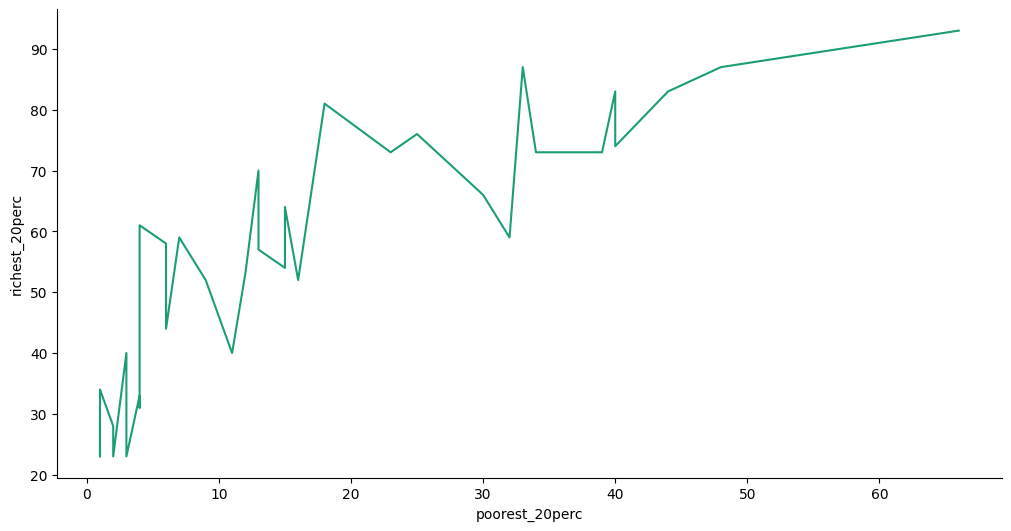

In [25]:
# @title poorest_20perc vs richest_20perc

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['poorest_20perc']
  ys = series['richest_20perc']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('poorest_20perc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('poorest_20perc')
_ = plt.ylabel('richest_20perc')

#####**Imputasi Missing Values**

Untuk kolom ***total***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***total***

In [27]:
df = pd.read_csv("data.csv", sep=";")

df['total'].dropna().describe()

count    37.000000
mean     34.756757
std      21.324745
min       5.000000
25%      18.000000
50%      32.000000
75%      51.000000
max      81.000000
Name: total, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***total*** untuk imputasi nilai kosong tersebut

In [28]:
df = pd.read_csv("data.csv", sep=";")

df['total'] = df['total'].fillna(df['total'].dropna().mean())

Untuk kolom ***diff*** akan kita lakukan yang sama seperti pada kolom ***total***, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [29]:
df['diff'] = df['diff'].fillna(df['diff'].mode()[0])

#####**Pengecekkan Ulang**

In [30]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
country,0.0
total,0.0
poorest_20perc,0.0
richest_20perc,0.0
diff,0.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Null Ratio %']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Null Ratio %'}, axis=1)
              .sort_values('Null Ratio %', ascending=True))
  xs = counted['Null Ratio %']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Null Ratio %', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Null Ratio %')
_ = plt.ylabel('count()')

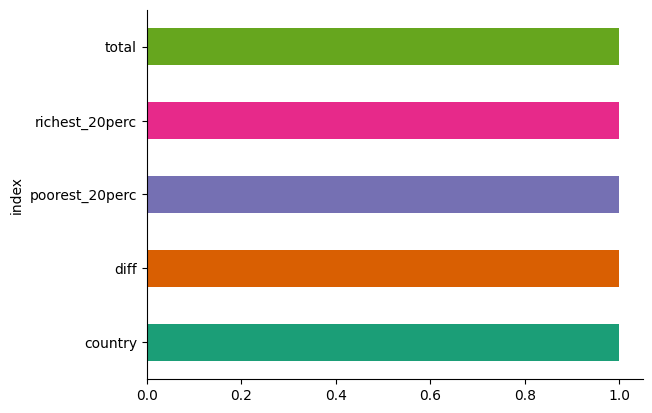

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [32]:
df[df.duplicated()]

,country,total,poorest_20perc,richest_20perc,diff


#####**Hapus Nilai Duplikat**

In [33]:
df = df.drop_duplicates()

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [34]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
total,0.0
poorest_20perc,0.0
richest_20perc,0.0
diff,0.0


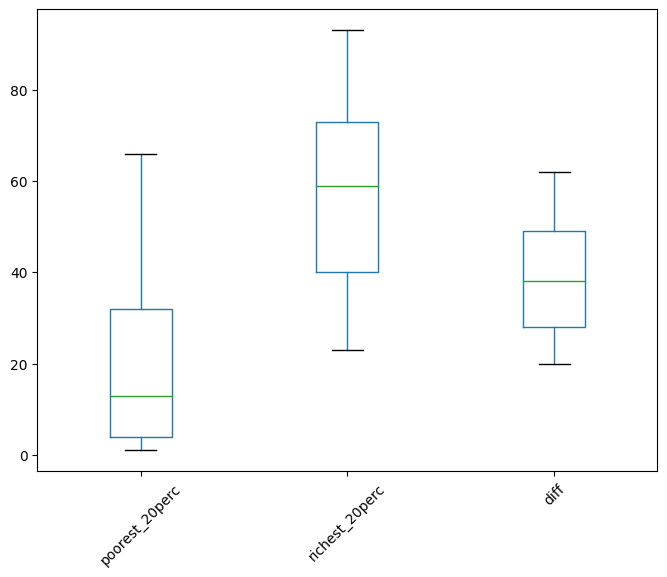

In [45]:
boxplot = df.drop('total', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

In [41]:
Q1 = df['diff'].quantile(0.25)
Q3 = df['diff'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['diff'] >= lower_bound) & (df['diff'] <= upper_bound)]

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "Fare"

In [42]:
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['total']=np.where(df['total']>upper_whisker,upper_whisker,np.where(df['total']<lower_whisker,lower_whisker,df['total']))

#####**Pengecekkan Ulang**

In [43]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
total,0.0
poorest_20perc,0.0
richest_20perc,0.0
diff,0.0


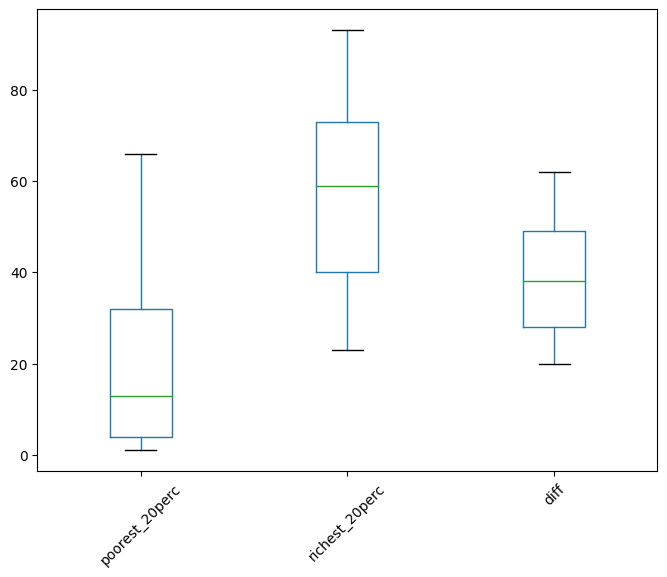

In [44]:
boxplot = df.drop('total', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [49]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv', sep=';')

# Menghitung perbedaan antara kolom richest_20perc dan poorest_20perc
df['diff'] = df['richest_20perc'] - df['poorest_20perc']

# Melakukan normalisasi pada kolom total menggunakan MinMaxScaler
scaler = MinMaxScaler()
df['total_normalized'] = scaler.fit_transform(df['total'].values.reshape(-1, 1))

# Menghapus kolom country karena tidak relevan untuk rekayasa fitur
df = df.drop('country', axis=1)

# Menampilkan dataset setelah rekayasa fitur
print(df.head())

   total  poorest_20perc  richest_20perc  diff  total_normalized
0      5               1              24    23          0.000000
1      6               1              23    22          0.013158
2      6               1              24    23          0.013158
3     11               1              34    33          0.078947
4     10               2              28    26          0.065789


###**Pengecekkan Hasil**

In [50]:
df.head()

,total,poorest_20perc,richest_20perc,diff,total_normalized
0,5,1,24,23,0.000000
1,6,1,23,22,0.013158
2,6,1,24,23,0.013158
3,11,1,34,33,0.078947
4,10,2,28,26,0.065789


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [51]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [53]:
# Memisahkan fitur dan target
X = df.drop('diff', axis=1)  # Menghilangkan kolom target 'diff'
y = df['diff']

# Menggunakan metode SelectKBest dengan f_regression sebagai skor fitur
k = 3  # Jumlah fitur yang ingin dipilih
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Mendapatkan indeks fitur-fitur terpilih
selected_feature_indices = selector.get_support(indices=True)

# Mendapatkan nama fitur-fitur terpilih
selected_features = X.columns[selected_feature_indices]

# Menampilkan dataset setelah mengurangi fitur
df_selected = pd.DataFrame(X_new, columns=selected_features)
print(df_selected.head())

   total  richest_20perc  total_normalized
0    5.0            24.0          0.000000
1    6.0            23.0          0.013158
2    6.0            24.0          0.013158
3   11.0            34.0          0.078947
4   10.0            28.0          0.065789


###**Pengecekkan Hasil**

In [54]:
df.head()

,total,poorest_20perc,richest_20perc,diff,total_normalized
0,5,1,24,23,0.000000
1,6,1,23,22,0.013158
2,6,1,24,23,0.013158
3,11,1,34,33,0.078947
4,10,2,28,26,0.065789


#**Data Transformation**

###**Mapping**

In [59]:
df = pd.read_csv('data.csv', sep=';')

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'country'
df['country_encoded'] = label_encoder.fit_transform(df['country'])

# Menampilkan dataset setelah melakukan label encoding
print(df.head())

                            country  total  poorest_20perc  richest_20perc  \
0  Lao People's Democratic Republic      5               1              24   
1                             Ghana      6               1              23   
2                            Bhutan      6               1              24   
3                          Honduras     11               1              34   
4                Dominican Republic     10               2              28   

   diff  country_encoded  
0    24               18  
1    22               11  
2    23                5  
3    33               13  
4    26                8  


In [60]:
df

,country,total,poorest_20perc,richest_20perc,diff,country_encoded
0,Lao People's Democratic Republic,5,1,24,24,18
1,Ghana,6,1,23,22,11
2,Bhutan,6,1,24,23,5
3,Honduras,11,1,34,33,13
4,Dominican Republic,10,2,28,26,8
5,Bangladesh,9,2,23,20,3
6,Tunisia,18,3,40,37,32
7,Algeria,11,3,23,20,1
8,Yemen,10,4,31,28,36
9,Suriname,25,4,61,57,26


###**Encoding**

In [61]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [62]:
df.head()

,total,poorest_20perc,richest_20perc,diff,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,...,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav Republic of Macedonia,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen
0,5,1,24,24,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,23,22,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,24,23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,1,34,33,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,28,26,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Modelling**

###**Pre-Processing**

In [63]:
x = df.drop('diff', axis=1)
y = df['diff']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [65]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit(x_test)

###**Build Model**

In [66]:
dtc = DecisionTreeClassifier()

In [67]:
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [68]:
prediction = dtc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [69]:
x_test

,total,poorest_20perc,richest_20perc,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,country_Bhutan,...,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav Republic of Macedonia,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen
17,33,13,57,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,26,7,59,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,28,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,55,34,73,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,73,48,87,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,47,25,76,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,18,3,40,32,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26,48,30,66,33,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,44,23,73,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,30,12,53,27,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
prediction

array([53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53])

In [71]:
x_test.shape

(12, 41)

In [74]:
compare_data.sample(1)

,total,poorest_20perc,richest_20perc,country_encoded,country_Albania,country_Algeria,country_Argentina,country_Bangladesh,country_Belize,country_Bhutan,...,country_Thailand,country_The former Yugoslav Republic of Macedonia,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Uzbekistan,country_Viet Nam,country_Yemen,Prediction,diff
9,30,12,53,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,53,41
